In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import xlrd
import sklearn.datasets as dta
import scipy.stats as st

In [2]:
gdp_df_original = pd.read_csv(r'Sources/GDP.csv')
gdp_df_original['DATE'] = gdp_df_original['DATE'].str.replace(r'-01-01$', '')
gdp_df_original = gdp_df_original.rename(columns={"DATE": "Year"})
gdp_df_original['Year'] = gdp_df_original['Year'].astype(int)


In [3]:
gdp_df_yearly = gdp_df_original.copy()
gdp_df_yearly.set_index('Year', inplace=True)

gdp_df_yearly["Annual (Adjusted) %"] = (gdp_df_yearly["GDP"] / gdp_df_yearly.loc[1999, "GDP"] - 1) * 100


In [4]:
gdp_df_yy = gdp_df_yearly[["GDP"]].copy()
gdp_df_yy["Annual Y/Y"] = gdp_df_yy.pct_change()
gdp_df_yy = gdp_df_yy.dropna()
gdp_df_yy["Annual Y/Y"] = gdp_df_yy["Annual Y/Y"] * 100


In [5]:
cpi_df_original = pd.read_excel (r'Sources/CPI for All Urban Consumers.xlsx')


In [6]:
cpi_df_yearly = cpi_df_original.copy()
del cpi_df_yearly['HALF1']
del cpi_df_yearly['HALF2']
cpi_df_yearly.set_index('Year', inplace=True)
cpi_df_yearly['Annual'] = cpi_df_yearly.mean(axis=1)

cpi_df_yearly["Annual (Adjusted) %"] = (cpi_df_yearly["Annual"] / cpi_df_yearly.loc[1999, "Annual"] - 1) * 100


In [7]:
cpi_df_yy = cpi_df_yearly[["Annual"]].copy()
cpi_df_yy["Annual Y/Y"] = cpi_df_yy.pct_change()
cpi_df_yy = cpi_df_yy.dropna()
cpi_df_yy["Annual Y/Y"] = cpi_df_yy["Annual Y/Y"] * 100


In [8]:
earning_df_original = pd.read_excel (r'Sources/Employment, Hours, and Earnings from the Current Employment Statistics survey (National).xlsx')


In [9]:
earning_df_yearly = earning_df_original.copy()
earning_df_yearly.set_index('Year', inplace=True)
earning_df_yearly['Annual'] = earning_df_yearly.mean(axis=1)

earning_df_yearly["Annual (Adjusted) %"] = (earning_df_yearly["Annual"] / earning_df_yearly.loc[1999, "Annual"] - 1) * 100
earning_df_adjusted = earning_df_yearly[["Annual (Adjusted) %"]]


In [10]:
earning_df_yy = earning_df_yearly[["Annual"]].copy()
earning_df_yy["Annual Y/Y"] = earning_df_yy.pct_change()
earning_df_yy = earning_df_yy.dropna()
earning_df_yy["Annual Y/Y"] = earning_df_yy["Annual Y/Y"] * 100


In [11]:
unemployment_df_original = pd.read_excel (r'Sources/Labor Force Statistics from the Current Population Survey.xlsx')


In [12]:
unemployment_df_yearly = unemployment_df_original.copy()
unemployment_df_yearly.set_index('Year', inplace=True)
unemployment_df_yearly['Annual'] = unemployment_df_yearly.mean(axis=1)

unemployment_df_yearly["Annual (Adjusted) %"] = (unemployment_df_yearly["Annual"] / unemployment_df_yearly.loc[1999, "Annual"] - 1) * 100


In [13]:
unemployment_df_yy = unemployment_df_yearly[["Annual"]].copy()
unemployment_df_yy["Annual Y/Y"] = unemployment_df_yy.pct_change()
unemployment_df_yy = unemployment_df_yy.dropna()
unemployment_df_yy["Annual Y/Y"] = unemployment_df_yy["Annual Y/Y"] * 100


In [14]:
productivity_df_original = pd.read_excel (r'Sources/Major Sector Multifactor Productivity.xlsx')

In [15]:
productivity_df_yearly = productivity_df_original.copy()
productivity_df_yearly.set_index('Year', inplace=True)
productivity_df_yearly["Annual (Adjusted) %"] = (productivity_df_yearly["Annual"] / productivity_df_yearly.loc[1999, "Annual"] - 1) * 100
productivity_df_adjusted = productivity_df_yearly[["Annual (Adjusted) %"]]


In [16]:
productivity_df_yy = productivity_df_yearly[["Annual"]].copy() 
productivity_df_yy["Annual Y/Y"] = productivity_df_yy.pct_change()
productivity_df_yy = productivity_df_yy.dropna()
productivity_df_yy["Annual Y/Y"] = productivity_df_yy["Annual Y/Y"] * 100


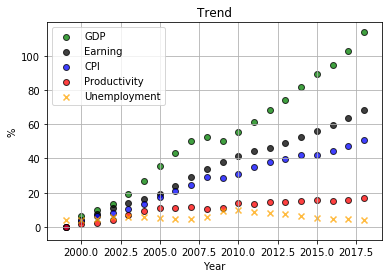

In [17]:
plt.scatter(cpi_df_yearly.index, gdp_df_yearly.loc[:, "Annual (Adjusted) %"], marker="o", facecolors="green", edgecolors="black", alpha=0.75, label='GDP')
plt.scatter(earning_df_yearly.index, earning_df_yearly.loc[:, "Annual (Adjusted) %"], marker="o", facecolors="black", edgecolors="black", alpha=0.75, label='Earning')
plt.scatter(cpi_df_yearly.index, cpi_df_yearly.loc[:, "Annual (Adjusted) %"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label='CPI')
plt.scatter(productivity_df_yearly.index, productivity_df_yearly.loc[:, "Annual (Adjusted) %"], marker="o", facecolors="red", edgecolors="black", alpha=0.75, label='Productivity')
plt.scatter(unemployment_df_yearly.index, unemployment_df_yearly.loc[:, "Annual"], marker="x", facecolors="orange", edgecolors="black", alpha=0.75, label='Unemployment')


plt.title("Trend")
plt.xlabel("Year")
plt.ylabel("%")
#legend = ["CPI", "Productivity", "Earning", "Unemployment", "GDP"]
plt.legend(loc="best")
plt.grid()

plt.savefig('Output/Trend.png')

plt.show()

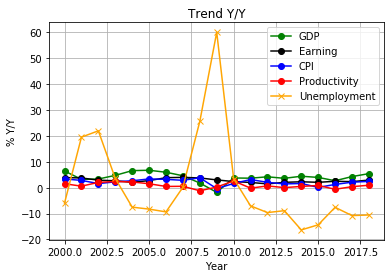

In [18]:
plt.plot(cpi_df_yy.index, gdp_df_yy.loc[:, "Annual Y/Y"], '-o', alpha= 5, label='GDP', color="green")
plt.plot(earning_df_yy.index, earning_df_yy.loc[:, "Annual Y/Y"], '-o', alpha= 5, label='Earning', color="black")
plt.plot(cpi_df_yy.index, cpi_df_yy.loc[:, "Annual Y/Y"], '-o', alpha= 5, label='CPI', color="blue")
plt.plot(productivity_df_yy.index, productivity_df_yy.loc[:, "Annual Y/Y"], '-o', alpha= 5, label='Productivity', color="red")
plt.plot(unemployment_df_yy.index, unemployment_df_yy.loc[:, "Annual Y/Y"], '-x', alpha= 5, label='Unemployment', color="orange")


plt.title("Trend Y/Y")
plt.xlabel("Year")
plt.ylabel("% Y/Y")
#legend = ["CPI", "Productivity", "Earning", "Unemployment", "GDP"]
plt.legend(loc="best")
plt.grid()

plt.savefig('Output/TrendYY.png')

plt.show()

In [19]:
unemployment_df_yy_scaled = unemployment_df_yy.copy()
unemployment_df_yy_scaled["Annual Y/Y"] = unemployment_df_yy_scaled["Annual Y/Y"] / 5

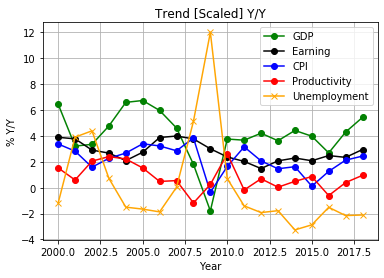

In [20]:
plt.plot(cpi_df_yy.index, gdp_df_yy.loc[:, "Annual Y/Y"], '-o', alpha= 5, label='GDP', color="green")
plt.plot(earning_df_yy.index, earning_df_yy.loc[:, "Annual Y/Y"], '-o', alpha= 5, label='Earning', color="black")
plt.plot(cpi_df_yy.index, cpi_df_yy.loc[:, "Annual Y/Y"], '-o', alpha= 5, label='CPI', color="blue")
plt.plot(productivity_df_yy.index, productivity_df_yy.loc[:, "Annual Y/Y"], '-o', alpha= 5, label='Productivity', color="red")
plt.plot(unemployment_df_yy_scaled.index, unemployment_df_yy_scaled.loc[:, "Annual Y/Y"], '-x', alpha= 5, label='Unemployment', color="orange")



plt.title("Trend [Scaled] Y/Y")
plt.xlabel("Year")
plt.ylabel("% Y/Y")
#legend = ["CPI", "Productivity", "Earning", "Unemployment", "GDP"]
plt.legend(loc="best")
plt.grid()

plt.savefig('Output/TrendYY_scaled.png')

plt.show()

R squard: -0.7865610328103321


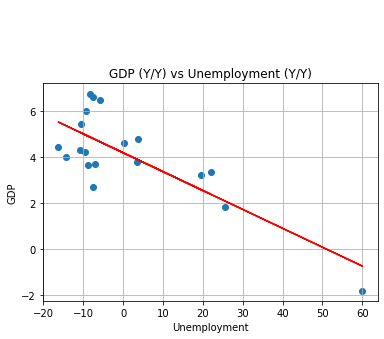

In [21]:
x_values = unemployment_df_yy["Annual Y/Y"].astype('float')
y_values = gdp_df_yy["Annual Y/Y"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("GDP (Y/Y) vs Unemployment (Y/Y)")
plt.xlabel('Unemployment')
plt.ylabel('GDP')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/UnemploymentVSGDP_YY.png')
plt.show()

R squard: 0.09042408819968002


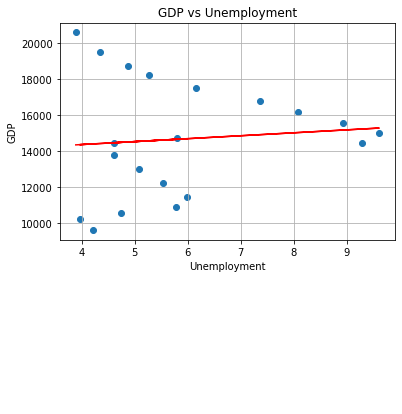

In [22]:
x_values = unemployment_df_yearly["Annual"].astype('float')
y_values = gdp_df_yearly["GDP"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("GDP vs Unemployment")
plt.xlabel('Unemployment')
plt.ylabel('GDP')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/UnemploymentVSGDP.png')
plt.show()

R squard: -0.26388091489820614


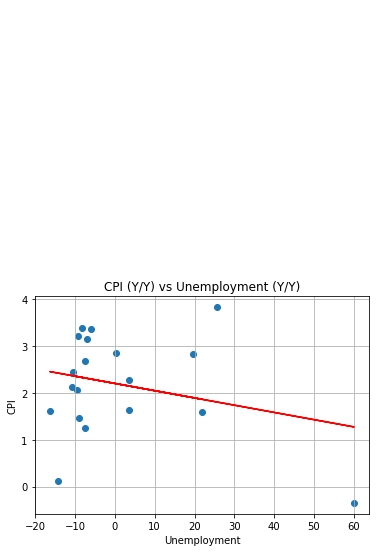

In [23]:
x_values = unemployment_df_yy["Annual Y/Y"].astype('float')
y_values = cpi_df_yy["Annual Y/Y"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("CPI (Y/Y) vs Unemployment (Y/Y)")
plt.xlabel('Unemployment')
plt.ylabel('CPI')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/UnemploymentVSCPI_YY.png')
plt.show()

R squard: 0.2305856531918071


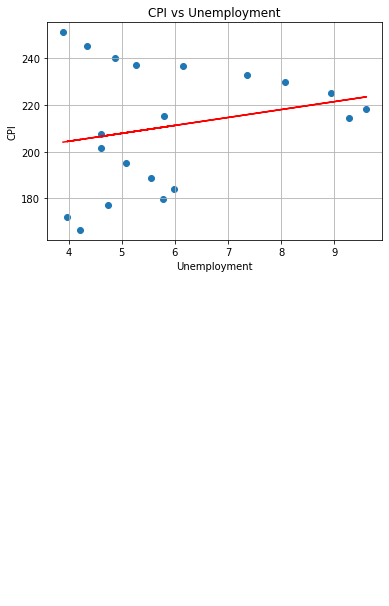

In [24]:
x_values = unemployment_df_yearly["Annual"].astype('float')
y_values = cpi_df_yearly["Annual"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("CPI vs Unemployment")
plt.xlabel('Unemployment')
plt.ylabel('CPI')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/UnemploymentVSCPI.png')
plt.show()

R squard: 0.3713976157707349


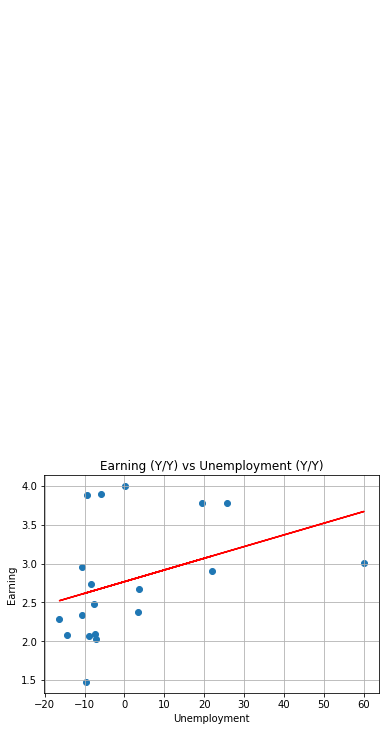

In [25]:
x_values = unemployment_df_yy["Annual Y/Y"].astype('float')
y_values = earning_df_yy["Annual Y/Y"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Earning (Y/Y) vs Unemployment (Y/Y)")
plt.xlabel('Unemployment')
plt.ylabel('Earning')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/UnemploymentVSEarning_YY.png')
plt.show()

R squard: 0.2143317815724119


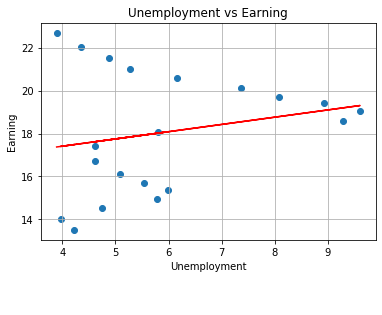

In [26]:
x_values = unemployment_df_yearly["Annual"].astype('float')
y_values = earning_df_yearly["Annual"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Unemployment vs Earning")
plt.xlabel('Unemployment')
plt.ylabel('Earning')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/UnemploymentVSEarning.png')
plt.show()

R squard: -0.09981025415277751


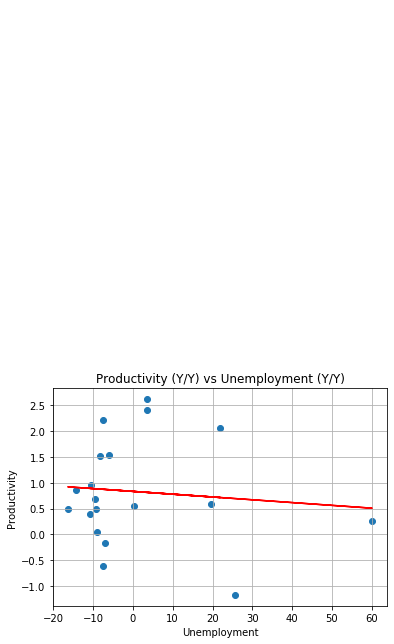

In [27]:
x_values = unemployment_df_yy["Annual Y/Y"].astype('float')
y_values = productivity_df_yy["Annual Y/Y"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Productivity (Y/Y) vs Unemployment (Y/Y)")
plt.xlabel('Unemployment')
plt.ylabel('Productivity')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/UnemploymentVSProductivity_YY.png')
plt.show()

R squard: 0.29148937997271307


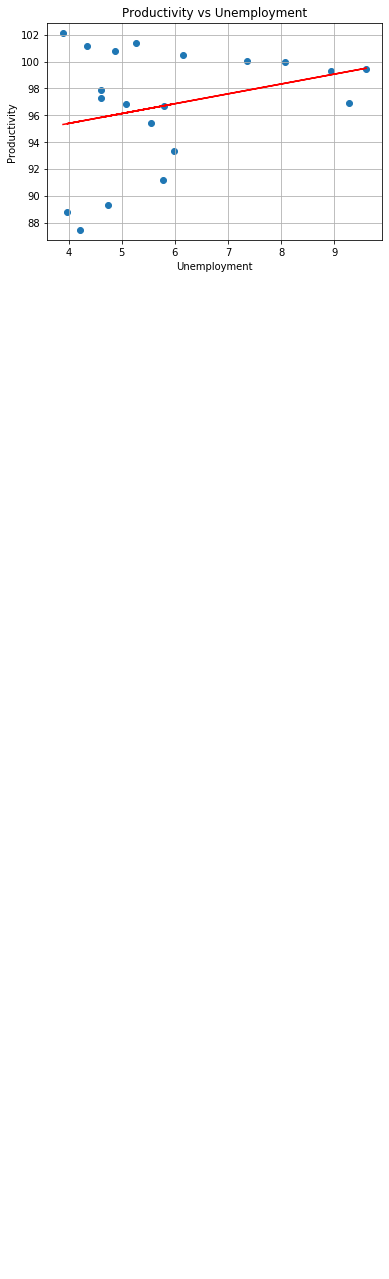

In [28]:
x_values = unemployment_df_yearly["Annual"].astype('float')
y_values = productivity_df_yearly["Annual"].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Productivity vs Unemployment")
plt.xlabel('Unemployment')
plt.ylabel('Productivity')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/UnemploymentVSProductivity.png')
plt.show()

R squard: 0.9495417501166962


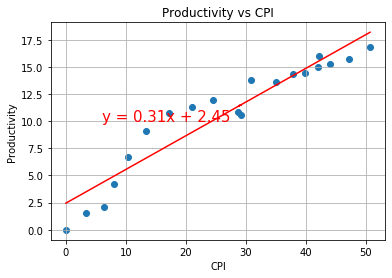

In [29]:
x_values = cpi_df_yearly['Annual (Adjusted) %'].astype('float')
y_values = productivity_df_yearly['Annual (Adjusted) %'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Productivity vs CPI")
plt.xlabel('CPI')
plt.ylabel('Productivity')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/CPI_vs_Productivity.png')
plt.show()

R squard: 0.9339510819020861


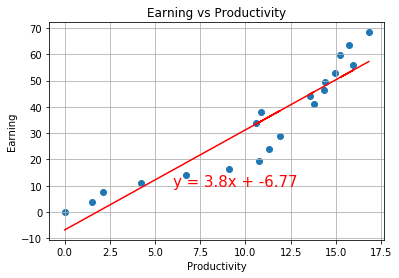

In [30]:
x_values = productivity_df_yearly['Annual (Adjusted) %'].astype('float')
y_values = earning_df_yearly['Annual (Adjusted) %'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Earning vs Productivity")
plt.xlabel('Productivity')
plt.ylabel('Earning')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/Earning_vs_Productivity.png')
plt.show()

R squard: 0.9956403966652823


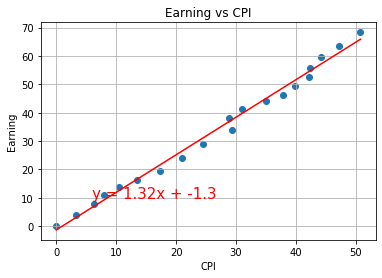

In [31]:
x_values = cpi_df_yearly['Annual (Adjusted) %'].astype('float')
y_values = earning_df_yearly['Annual (Adjusted) %'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Earning vs CPI")
plt.xlabel('CPI')
plt.ylabel('Earning')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/CPI_vs_Earning.png')
plt.show()

R squard: 0.9873328868353147


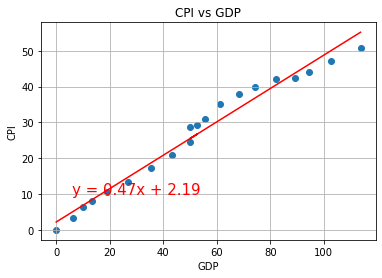

In [32]:
x_values = gdp_df_yearly["Annual (Adjusted) %"].astype('float')
y_values = cpi_df_yearly['Annual (Adjusted) %'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("CPI vs GDP")
plt.xlabel('GDP')
plt.ylabel('CPI')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/GDP_vs_CPI.png')
plt.show()

R squard: 0.9904512885310782


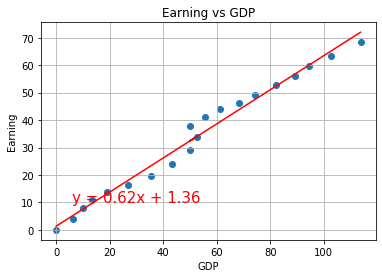

In [33]:
x_values = gdp_df_yearly["Annual (Adjusted) %"].astype('float')
y_values = earning_df_yearly['Annual (Adjusted) %'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Earning vs GDP")
plt.xlabel('GDP')
plt.ylabel('Earning')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/GDP_vs_Earning.png')
plt.show()

R squard: 0.9318094407811642


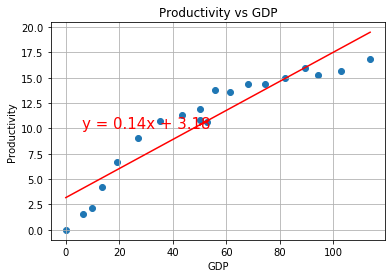

In [34]:
x_values = gdp_df_yearly["Annual (Adjusted) %"].astype('float')
y_values = productivity_df_yearly['Annual (Adjusted) %'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title("Productivity vs GDP")
plt.xlabel('GDP')
plt.ylabel('Productivity')
plt.grid()

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.savefig('Output/GDP_vs_Productivity.png')
plt.show()

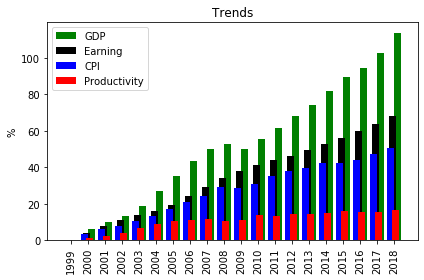

In [35]:
labels = cpi_df_yearly.index
cpi_bar = cpi_df_yearly.loc[:, "Annual (Adjusted) %"]
earning_bar = earning_df_yearly.loc[:, "Annual (Adjusted) %"]
productivity_bar = productivity_df_yearly.loc[:, "Annual (Adjusted) %"]
gdp_bar = gdp_df_yearly.loc[:, "Annual (Adjusted) %"]
#unemployment_bar = unemployment_df_yearly.loc[:, "Annual (Adjusted) %"]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x + 0.2, gdp_bar, width, label='GDP', color='green')
rects2 = ax.bar(x - 0.1, earning_bar, width, label='Earning', color='black')
rects3 = ax.bar(x - 0.2, cpi_bar, width, label='CPI', color='blue')
rects4 = ax.bar(x + 0.1, productivity_bar, width, label='Productivity', color='red' )

#rects5 = ax.bar(x + 0.3, unemployment_bar, width, label='Unemployment')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('Trends')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation="vertical")
ax.legend()


#def autolabel(rects):
#    """Attach a text label above each bar in *rects*, displaying its height."""
#    for rect in rects:
#        height = rect.get_height()
#        ax.annotate('{}'.format(height),
#                    xy=(rect.get_x() + rect.get_width() / 2, height),
#                    xytext=(0, 3),  # 3 points vertical offset
#                    textcoords="offset points",
#                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.savefig('Output/Trend_BAR.png')
plt.show()

In [36]:
gdp = gdp_df_yearly.loc[:, "GDP"]
cpi = cpi_df_yearly.loc[:, "Annual"]
earning = earning_df_yearly.loc[:, "Annual"]
unemployment = unemployment_df_yearly.loc[:, "Annual"]
productivity = productivity_df_yearly.loc[:, "Annual"]

frame = {'GDP': gdp, 'CPI': cpi, 'Earning': earning, 'Unemployment': unemployment, 'Productivity': productivity}
annual_adjusted_pd = pd.DataFrame(frame)
#annual_adjusted_pd = annual_adjusted_pd.reset_index(drop=True)
annual_adjusted_pd


,GDP,CPI,Earning,Unemployment,Productivity
Year,,,,,
1999,9630.66250,166.575000,13.487500,4.216667,87.439
2000,10252.34650,172.200000,14.012500,3.966667,88.776
2001,10581.82225,177.066667,14.541667,4.741667,89.305
2002,10936.41825,179.875000,14.964167,5.783333,91.139
2003,11458.24575,183.958333,15.364167,5.991667,93.328
2004,12213.73025,188.883333,15.685833,5.541667,95.399
2005,13036.63700,195.291667,16.115833,5.083333,96.856
2006,13814.60900,201.591667,16.740833,4.608333,97.324
2007,14451.85900,207.342417,17.409167,4.616667,97.858


In [37]:
#correlation = st.pearsonr(gdp,cpi,earning,unemployment,productivity)
#print(f"The correlation between both factors is {round(correlation[0],2)}")
annual_corr = annual_adjusted_pd.corr()
annual_corr.unstack().sort_values()

GDP           Unemployment    0.090424
Unemployment  GDP             0.090424
              Earning         0.214332
Earning       Unemployment    0.214332
CPI           Unemployment    0.230586
Unemployment  CPI             0.230586
              Productivity    0.291489
Productivity  Unemployment    0.291489
              GDP             0.931809
GDP           Productivity    0.931809
Productivity  Earning         0.933951
Earning       Productivity    0.933951
Productivity  CPI             0.949542
CPI           Productivity    0.949542
GDP           CPI             0.987333
CPI           GDP             0.987333
Earning       GDP             0.990451
GDP           Earning         0.990451
CPI           Earning         0.995640
Earning       CPI             0.995640
GDP           GDP             1.000000
Earning       Earning         1.000000
CPI           CPI             1.000000
Unemployment  Unemployment    1.000000
Productivity  Productivity    1.000000
dtype: float64